In [1]:
%matplotlib inline

# Test out enobio/enobio.py

Problems
--------
- Eeglab (or pop_easy.m) might be adding "precision" to the raw EEG values.

In [2]:
import os.path as op

import numpy as np
import pandas as pd

from enobio import read_raw_enobio
from mne.io import read_raw_eeglab

from mne import set_log_level
set_log_level(verbose="error")

In [3]:
input_fname = 'data/0_easy/20160910083157_NEU_001_song_Protocol 1.easy'
montage = 'Enobio32'  # Without the extension. Can be Enobio32 or None.
# If you do not specify montage_path, path will default to
# the mne/channels/data/montages folder in your mne-python installation
montage_path = 'enobio/data/montages/'

input_fname_compare = 'data/1_raw/20160910083157_NEU_001_song_Protocol 1.easy.set'

In [4]:
raw = read_raw_enobio(input_fname, montage='Enobio32', 
                      montage_path=montage_path)
raw

<RawEnobio  |  20160910083157_NEU_001_song_Protocol 1.easy, n_channels x n_times : 33 x 167250 (334.5 sec), ~42.2 MB, data loaded>

In [5]:
raw_compare = read_raw_eeglab(input_fname_compare, preload=True, verbose="error")
raw_compare

<RawEEGLAB  |  20160910083157_NEU_001_song_Protocol 1.easy.fdt, n_channels x n_times : 33 x 167250 (334.5 sec), ~42.2 MB, data loaded>

In [6]:
# Compare values in the raw .easy file, the loaded .easy file, 
# and the loaded .set file.
row, col = 0, 0
with open(input_fname) as f:
    for i, line in enumerate(f):
        if i == row:
            raw_value = int(line.split()[col]) / 1000.

print "Raw value:\t", raw_value
print "Load easy file:\t", raw.to_data_frame().values[row,col]
print "Load set file:\t", raw_compare.to_data_frame().values[row,col]

Raw value:	-29819.349
Load easy file:	-29819.349
Load set file:	-29819.3496094


In [7]:
raw.filter(0.5, 40)
raw_compare.filter(0.5, 40)

<RawEEGLAB  |  20160910083157_NEU_001_song_Protocol 1.easy.fdt, n_channels x n_times : 33 x 167250 (334.5 sec), ~42.2 MB, data loaded>

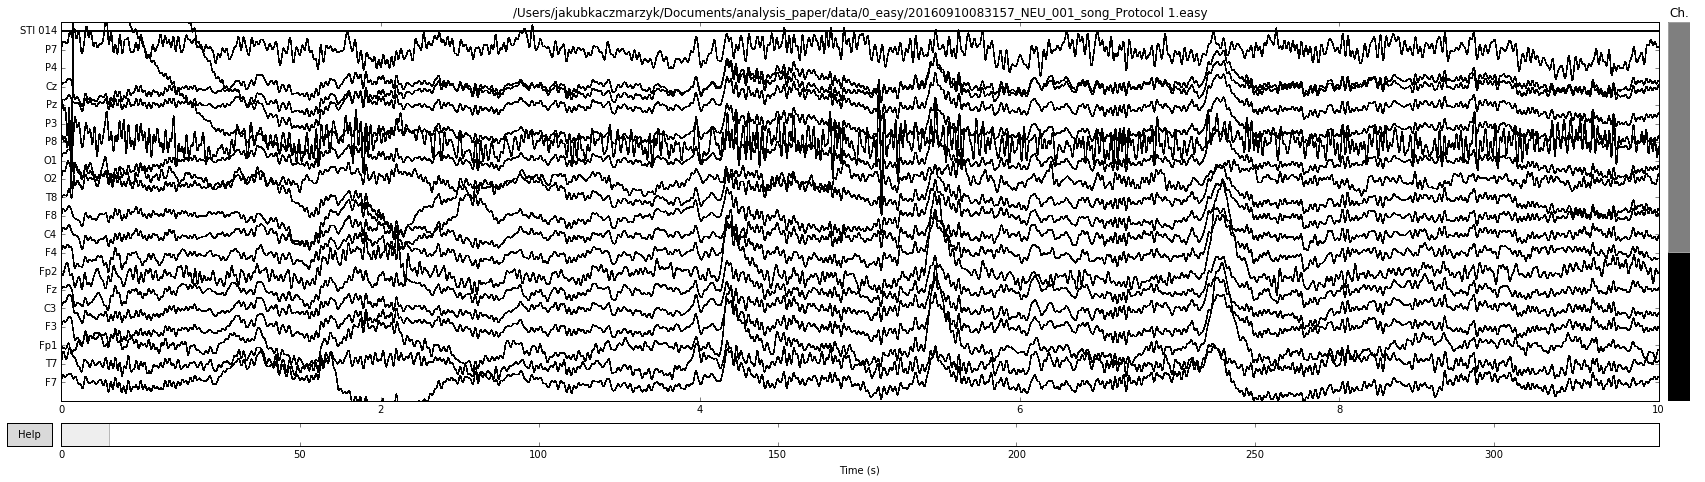

Figure(1920x546)


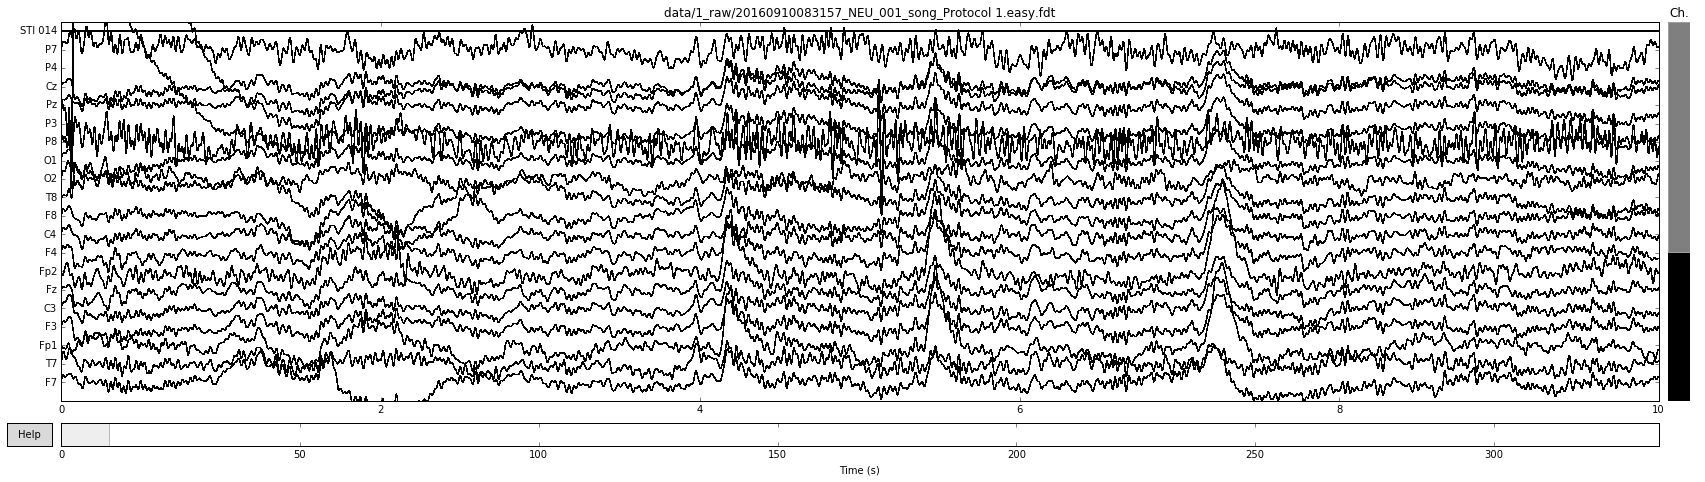

Figure(1920x546)


In [8]:
print raw.plot()
print raw_compare.plot()

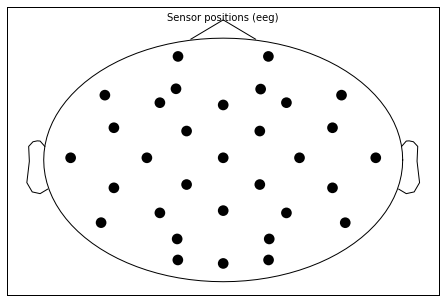

Figure(480x320)


In [10]:
print raw.plot_sensors()

In [11]:
# Compare the values in the info attributes of the raw objects.
aa = raw.info
bb = raw_compare.info
for key in aa:
    try:
        if aa[key] == bb[key]:
            continue
            # print "{} is the same".format(key)
        else:
            print "{} is different *".format(key)
    except ValueError:
        print "ValueError on {} !".format(key)

meas_date is different *
filename is different *
ValueError on chs !
ValueError on dev_head_t !
